### Do it! 실습 | 연령대 변수 검토 및 전처리하기

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
# 데이터 불러오기
raw_welfare = pd.read_spss('/Users/heohyeonjun/Desktop/We_IT_5th/weit/Data/Koweps_hpwc14_2019_beta2.sav')

# 복사본 만들기
welfare = raw_welfare.copy()

In [3]:
welfare = welfare.rename(
    columns = {
        'h14_g3' : 'sex', # 성별
        'h14_g4' : 'birth', # 태어난 연도
        'h14_g10' : 'merrage_type', # 혼인 상태
        'h14_g11' : 'religion', # 종교
        'p1402_8aq1' : 'income', # 월급
        'h14_eco9' : 'code_job', # 직업 코드
        'h14_reg7' : 'code_region' # 지역 코드
    }
)

In [5]:
welfare = welfare.assign(age = 2019 - welfare['birth'] + 1) # 나이 변수 만들기

In [6]:
# 나이 변수 살펴보기
welfare['age'] .head()

0    75.0
1    72.0
2    78.0
3    58.0
4    57.0
Name: age, dtype: float64

In [8]:
# 연령대 변수 만들기
welfare = welfare.assign(ageg = np.where(welfare['age'] < 30, 'young',
                                np.where(welfare['age'] <= 59,'middle',
                                                                'old')))

# 빈도 구하기
welfare['ageg'].value_counts()

old       5955
middle    4963
young     3500
Name: ageg, dtype: int64

<AxesSubplot:xlabel='ageg', ylabel='count'>

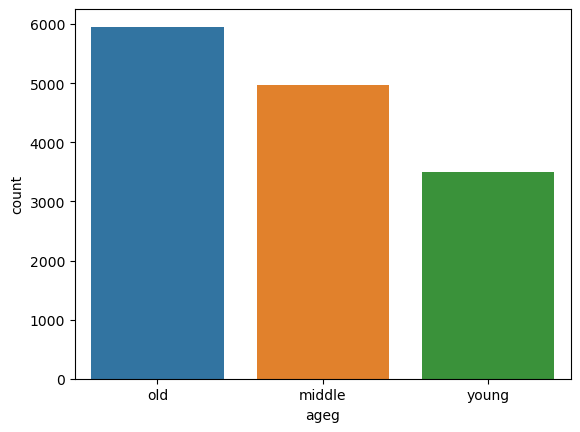

In [11]:
# 빈도 막대 그래프 만들기
sns.countplot(data= welfare, x='ageg', hue='ageg')

### Do it! 실습 | 연령대에 따른 월급 차이 분석하기

In [19]:
# 연령대별 월급 평균 표 만들기
ageg_income = welfare.dropna(subset=['income']).groupby('ageg', as_index=False).agg(mean_income = ('income', 'mean'))
ageg_income

,ageg,mean_income
0,middle,329.157157
1,old,140.129003
2,young,195.663424


<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

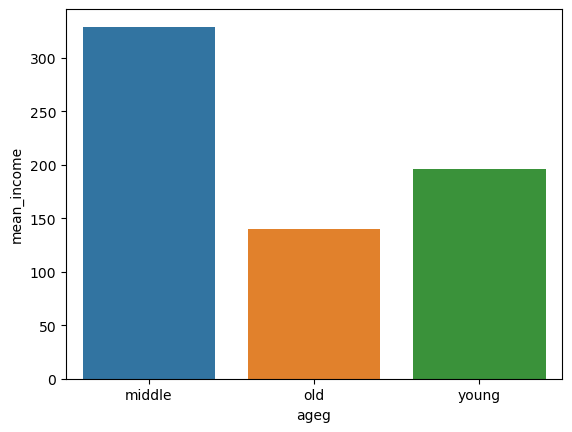

In [23]:
# 막대 그래프 만들기
sns.barplot(data=ageg_income, x='ageg', y='mean_income', hue='ageg')

<AxesSubplot:xlabel='ageg', ylabel='mean_income'>

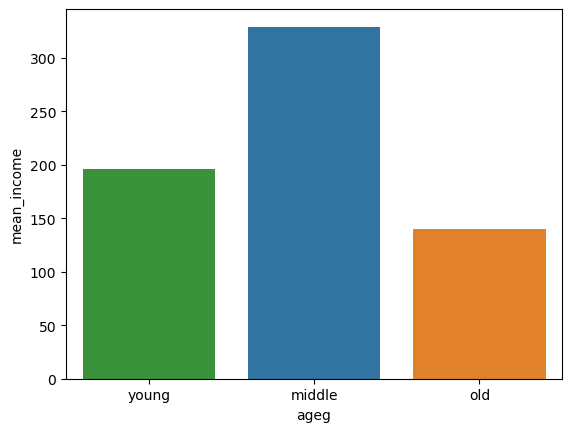

In [25]:
# 막대 정렬하기
sns.barplot(data=ageg_income, x='ageg', y='mean_income', hue='ageg', order=['young', 'middle', 'old'])